# Roteiro 1
Nesse notebook, vamos implementar um analisador de espectro digital. Os objetivos são

* relacionar a fft de um sinal amostrado com a transformada de Fourier do sinal analógico correspondente.
* interpretar o significado dos componentes da fft
* prever as consequências de aliasing
* evitar as consequências de aliasing através de uma filtragem simples
* saber trabalhar com as consequências das simetrias da fft.

## Relatório
As questões do roteiro devem ser respondidas em um arquivo google docs e submetidas no google classroom. Anexe uma cópia dos códigos utilizados e um breve vídeo explicando o que foi feito.

Inicialmente, vamos carregar algumas bibliotecas de Python. As primeiras são meio básicas. A última serve para podermos ouvir arquivos de áudio diretamente no notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd



# Frequências representadas e aliasing


### PARTE I

Após carregar os pacotes necessários e configurar os gráficos, vamos carregar e ouvir um sinal de áudio.

**1.** Qual a maior frequência do sinal original que pode ser recuperada a partir do sinal amostrado? *(DICA: Apresente o código, o resultado da variável Fs e justifique sua resposta com base na teoria)*

**2.** O que ocorreu com as frequências do sinal analógico maiores do que esse valor máximo? *(DICA: Justifique essa questão com o embasamento teórico sobre a Teoria da Amostragem)*

In [ ]:
#importo os arquivos salvos no meu drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importa a biblioteca
from scipy.io import wavfile

#salva na variável "fs" a quantidade de amostras/sec e em "som" os dados do arquivo
fs, som = wavfile.read("/content/drive/MyDrive/Grilo.wav")

#reproduz os dados em som na frequência fs
ipd.Audio(som,rate=fs)



In [ ]:
#mostra a frequência de amostragem em Hz
print(fs)

48000


In [ ]:
pwd

'/content'

**Questão 1**

Pelo teorema da amostragem(Nyquist-Shannon), entende-se que a maior frequência do sinal de pode ser recuperada é a frequência de amostragem divida por 2, logo temos que:

$f_m = f_s/2 = 48000/2 = 24 kHz$

**Questão 2**



Podemos exemplificar a resposta da questão 2 graficamente, exibindo a resposta em frequência dos valores reais deste sinal. Para isso temos o seguinte código:

No handles with labels found to put in legend.


Text(0.5, 0, '$f (Hz)$')

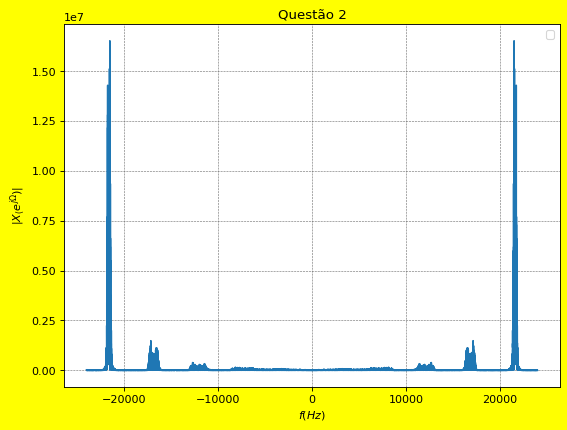

In [ ]:
#faz a fft do sinal som
X_real_som = np.abs(np.fft.fft(som))
#cria o vetor de frequencias negativas e positivas
f = np.linspace(-fs/2, fs/2, X_real_som.size)

#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 2")
ax.plot(f , X_real_som)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$f (Hz)$')

Entende-se que ocorre o fenômeno de aliasing, onde as frequências maiores que $f_m$ são perdidas.

O vetor `som` acima é o resultado da amostragem do som do grilo. Este processo é ilustrado na figura abaixo. Inicialmente um microfone transforma o som em um sinal elétrico. Em seguida, ele passa por um conversor analógico digital, que produz a sequência de valores capturadas no vetor `som`.


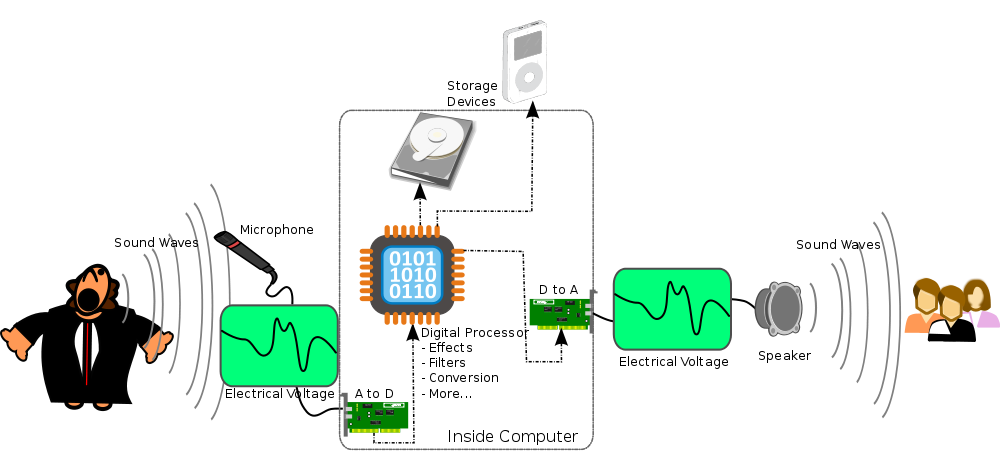



Após a amostragem, o sinal digital pode ser processado por um computador, celular, microcontrolador. Pode ser também armazenado ou transmitido digitalmente. Finalmente, para ouvir o sinal, como no comando `ip.Audio`acima, o sinal digital passa por um conversor digital-analógico, que o transforma novamente em um sinal analógico elétrico. Esse sinal é então colocado no alto-falante.

Os elementos do sinal digital, $s_d[n]$, são teoricamente iguais aos valores do sinal analógico nos instantes de amostragem. Ou seja

$$s_d[n] = s_c(t)|_{t = nT_s}$$
onde $T_s$ é o período de amstragem. A relação entre os sinais analógico e digital é ilustrada na figura abaixo:



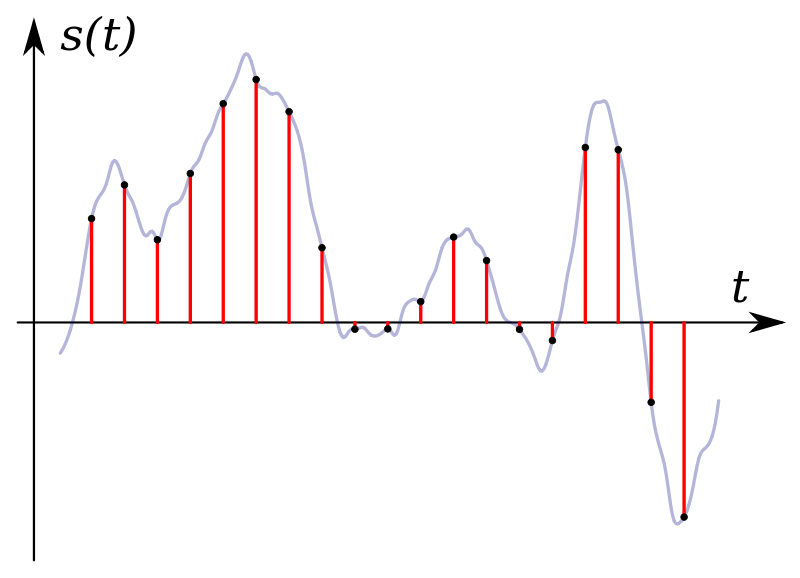


A seguir vamos mostrar os sete primeiros valores do sinal digital, para ilustrar bem o fato de que o sinal digital é um vetor, uma sequência de valores.

In [ ]:
som[:7]

array([ 10,   9,  10,   5,   0,  -7, -13], dtype=int16)

Podemos também plotar o sinal de áudio. Observe que aqui temos apenas seus valores nos instantes de amostragem. Qualquer valor mostrado entre esses instantes são criados pelas rotinas gráficas que o matplotlib usa para gerar suas figuras.

Observe também que cada amostra corresponde a $T_s = 1/ f_s$ segundos. Assim, para fazer o eixo x em segundos, devemos gerar um vetor de tempo adequado.

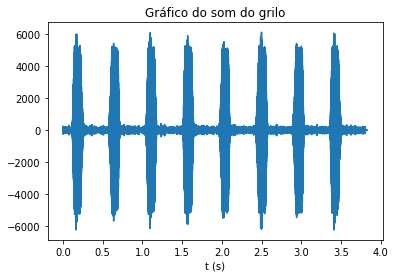

In [ ]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.title('Gráfico do som do grilo')
plt.xlabel('t (s)');

Para ressaltar o fato de que o Python cria valores entre as amostras, vamos dar bastante zoom no gráfico, usando o comando `xlim`. E vamos sobrepor dois gráficos. Um deixando o matplotlib ter seu comportamento padrão, unindo valores adjacentes, outro obrigando o matplotlib a mostrar círculos vermelhos apenas nos instantes onde há amostras.

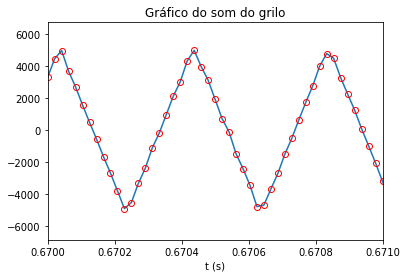

In [ ]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.plot(t,som,'ro',fillstyle = 'none')
plt.title('Gráfico do som do grilo')
plt.xlabel('t (s)');
plt.xlim((0.67,0.671));

### PARTE II

**3.** Gere agora o espectro do sinal, colocando as frequências analógicas, em Hz, no eixo x. *(DICA: O comando fft() no Matlab calcula, de forma computacionalmente eficiente, a DFT de um sinal, de modo que podemos escrever algo como Y = fft(y). Atenção: o Matlab começa um vetor com o índice 1 e não 0! Esse cuidado com os índices não é necessário em Python.

Comandos úteis em Python, em que x representa um vetor:


*   np.abs(x) calcula o valor absoluto de cada elemento de x
*   np.fft.fft(x) calcula a DFT de x
*   np.fft.ifft(x) calcula a DFT inversa de x
*   x.size retorna o número de elementos de x
*   np.real(x) retorna a parte real de x
*   np.imag(x) retorna a parte imaginária de x
*   np.amax(x) calcula o maior elemento de x



Trace seu gráfico, usando o comando plot, de forma a ressaltar os componentes em frequência mais relevantes. Observe que o vetor gerado é complexo. Para ver como determinar a relevância de um componente a partir desse número complexo, por favor, veja a interpretação da transformada de Fourier para sinais reais mostrada na parte inicial do pdf que acompanha este experimento)*

**4.** Mostre no relatório a figura gerada, identificando onde estão as frequências negativas, e onde podem ser observadas as simetrias que surgem devido ao fato de que o sinal de áudio é real. *(DICA: Justifique essa questão com o embasamento teórico sobre a Teoria da Amostragem)*

**5.** Observe que o sinal tem 2 grupos principais de frequência, considerando as frequências positivas. Grupo aqui significa um conjunto contíguo de frequências não nulas, separadas por uma faixa de frequências nulas.
* Identifique a principal frequência de cada grupo, dando a resposta em Hz.
Em outras palavras, você vai identificar quais são as duas principais frequências presentes no sinal analógico original, que foi amostrado para gerar o sinal de áudio com que estamos trabalhando. Essa etapa pode ser feita na força bruta, plotando só as partes relevantes do gráfico, usando `plt.xlim` em Python ou `xlim` em Matlab.

**Questão 3**

O gráfico, que é pedido nessa questão, está representado abaixo:


No handles with labels found to put in legend.


Text(0.5, 0, '$f (Hz)$')

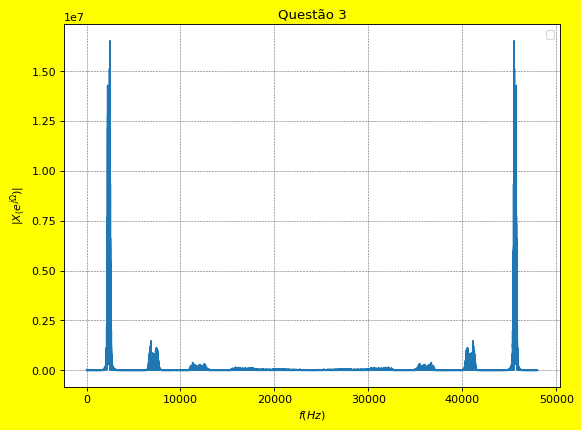

In [ ]:
#faz a fft do sinal som
X_som = np.abs(np.fft.fft(som))
#cria o vetor de frequencias de 0 a fs
f = np.linspace(0, fs, X_som.size)

#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 3")
ax.plot(f , X_som)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$f (Hz)$')

**Questão 4**

Como se tratam de sinais reais, sabe-se que ele pode ser escrito através de senoides e cossenoides, estas que por Euler, podem ser escritas com soma de fases opostas, pois:

$cos x = \frac{[e^{ix} + e^{-ix}]}{2}$

Disso, podemos identificar a simetria representando os módulos, e as fases, onde o ponto de simetria deve ser dado por pi radianos. Logo temos que:

No handles with labels found to put in legend.


Text(0.5, 0, '$\\Omega$')

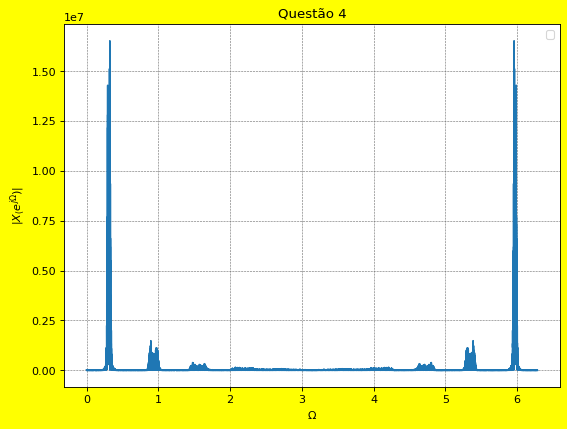

In [ ]:
#faz a fft do sinal som
X_som = np.abs(np.fft.fft(som))
#cria vetor de fase
f_omega= np.linspace(0, 2*np.pi, X_som.size)

#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 4")
ax.plot(f_omega , X_som)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$\Omega$')

**Questão 5**



Considerando as frequências positivas, ou seja de 0 a pi, utilizando o "script" abaixo, podemos encontrar que a frequência de maior módulo é dada por 2484.938 Hz. Ainda, percebe-se que pelo gráfico que outra frequência que possui módulo com relevância está por volta de 7000Hz.

No handles with labels found to put in legend.


A frequência de maior módulo é:  2484.938185617273 Hz


Text(0.5, 0, '$f (Hz)$')

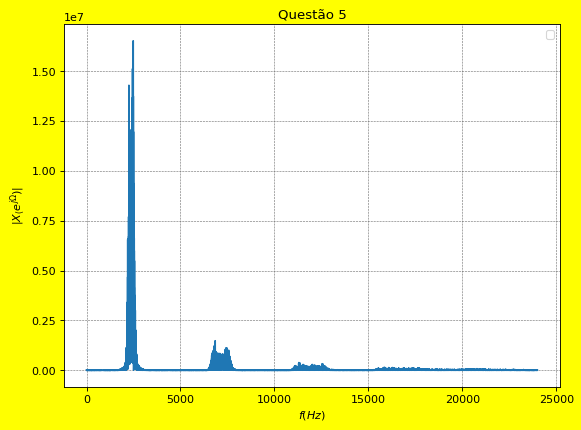

In [ ]:

#cria variaveis auxiliares
k = int(som.size/2)
ki = int(k)
lista = []

#fft e vetor de frequencias
X_som = np.abs(np.fft.fft(som))
f= np.linspace(0, fs/2, k)

#grava metade do vetor X_som na lista
for i in range(int(X_som.size/2)):
  lista.append(X_som[i])

#encontra o maior valor de módulo
maximo = max(lista, key = float)

#acha a posição que ta o maior valor
for i in range(len(lista)):
  if lista[i]==maximo:
   s = i

#acha a frequencia correspondente
max1 = f[s]
print("A frequência de maior módulo é: ",f[s], "Hz")



#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 5")
ax.plot(f , lista)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$f (Hz)$')


### PARTE III

Vamos agora tomar as amostras do sinal de áudio de nove em nove. Reproduza esse áudio. Você tem que atentar para a frequência de amostragem que você vai passar para o reprodutor de áudio.

**6.** A operação de pegar as amostras de 9 em 9 corresponde a amostrar o sinal analógico original a que taxa?

In [ ]:
subamostrado = som[::9]
fs_nova = fs/9
ipd.Audio(subamostrado,rate=int(fs_nova))

* Mostre no relatório o valor da nova frequência de amostragem, e quais frequências do sinal original são bem reproduzidas no novo sinal, e quais sofrem aliasing. *(DICA: Apresente o cálculo e justifique sua resposta com base na teoria)*

**7.** Compare a DFT do sinal subamostrado com a DFT do sinal original, mostrando neste último gráfico apenas as frequências que deveriam ser bem representadas no sinal subamostrado. Destaque algum ponto onde o fenômeno de aliasing seja evidente. *(DICA: Apresente ambos os gráficos e utilize recursos de zoom para apoiar sua resposta. Normalize os dois gráficos para facilitar a compração entre eles.)*

In [ ]:
print(fs_nova)
fm_nova = fs_nova/2
print(fm_nova)

5333.333333333333
2666.6666666666665


**Questão 6**

Ao pegar as amostras de 9 em 9, podemos verificar que a amostragem será feita a seguinte taxa:

$fs_{nova}  = \frac{f_s}{9} = 5333.33 Hz$


Como explicado no exercício 1, a maior frequência do sinal de pode ser recuperada é a frequência de amostragem divida por 2, logo temos que:

$fm_{nova} = \frac{fs_{nova}}{2} = 2666.66 Hz$

**Questão 7**

Abaixo é possível visualizar o gráfico da DFT do sinal subamostrado:

No handles with labels found to put in legend.


Text(0.5, 0, '$f (Hz)$')

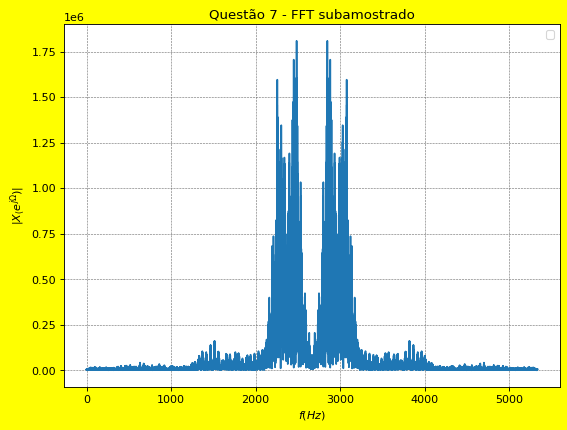

In [ ]:
Xsubamostrado = np.abs(np.fft.fft(subamostrado))
f_sub = np.linspace(0, fs_nova, Xsubamostrado.size)

#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 7 - FFT subamostrado")
ax.plot(f_sub , Xsubamostrado)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$f (Hz)$')

Já aqui, se vê a DFT do sinal original:

No handles with labels found to put in legend.


Text(0.5, 0, '$f (Hz)$')

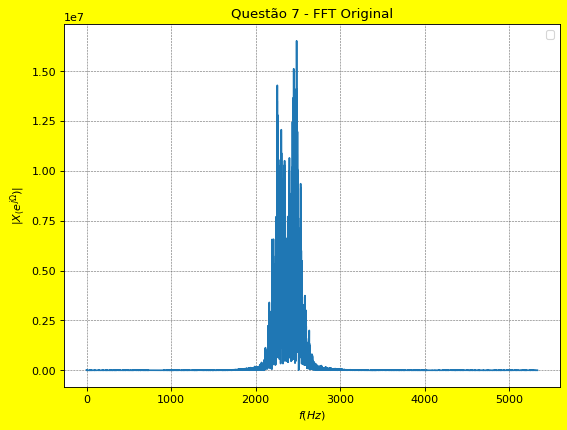

In [ ]:
X_som = np.abs(np.fft.fft(som))



lista = []

for i in range(int(X_som.size/9)):
  lista.append(X_som[i])

f = np.linspace(0, fs/9, len(lista))

#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 7 - FFT Original")
ax.plot(f , lista)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$f (Hz)$')

Além da questão simetria, presente no subamostrado, percebe-se que quanto maior for a frequência de amostragem, menos exposto a ruídos o sinal vai estar, tornando o sinal mais limpo. Isto é possível visualizar comparando a FFT original e a subamostrada, onde a original tem um sinal bem mais "limpo" que a subamostrada.

### PARTE IV

**8.** Para eliminar o aliasing, podemos passar o sinal por um filtro passa baixas antes de fazer a subamostragem. Vamos aqui fazer algo diferente: vamos eliminar diretamente os componentes em frequência que sofrerão aliasing.
* Para fazer isso, gere primeiramente a DFT do sinal original, e zere todas as frequências que sofrerão aliasing. Para isso você pode usar um comando do tipo `DFT[K_inicial:K_final] = 0`.
* Recupere agora o sinal no tempo através da DFT inversa, e depois faça a subamostragem.

Lembre-se que o resultado deve ser real, portanto quando uma frequência for zerada, a componente na frequência negativa correspondente também deve ser zerada. Mesmo com esse cuidado, o sinal final terá um pequeno componente imaginário, por questões numéricas. Se esse componente for muito pequeno, da ordem de $10^{-12}$, isso significa que você fez tudo certo. Nesse caso, essa parte imaginária desprezível deve ser eliminada tomando apenas a parte real do sinal.

* No relatório, mostre os valores de K_inicial e K_final que você usou para zerar as frequências, com uma breve explicação de como esses valores foram obtidos.

*(DICA: Utilize os valores de frequência que são bem representados a essa taxa de amostragem e as relações Ω, w, f e k para encontrar os valores de K_inicial e K_final)*

**9.** Compare também os gráficos das DFTs do novo sinal subamostrado e do sinal original, novamente mostrando, neste último gráfico, apenas as frequências que deveriam ser bem representadas no sinal subamostrado. *(DICA: Apresente ambos os gráficos e utilize recursos de zoom para apoiar sua resposta)*

**10.** Ouça os dois sinais subamostrados, com e sem filtro anti-aliasing, para observar o impacto da filtragem anti-aliasing. A diferença nesse caso é sutil, sem um bom fone de ouvido será difícil perceber. *(DICA: Comente sobre as diferenças entre os áudios e sobre a necessidade de subamostrar um sinal e de utilizar um filtro anti-aliasing)*

**Questão 8**

Para eliminar as frequências que sofreram aliasing, deve-se lembrar que a máxima frequência a ser amostrada é dada por:

$fm_{nova} = \frac{fs_{nova}}{2} = 2666,66 Hz$

Disso, podemos dizer que:

$k_{inicial} = fm_{nova} = 2666,66 Hz$

Logo, como o sinal passará pelo filtro antes de ser subamostrado, podemos dizer que o $k_{final}$ será:

$k_{final} = fs - fm_{nova} = 48000 Hz - 2666,66 Hz = 45333,34 Hz$





In [ ]:
k_inicial = 2666.66
k_final = 45333.34
Xsubamostrado[int(k_inicial):int(k_final)] = 0

Xsubfiltro = np.fft.ifft(Xsubamostrado)[::9]


**Questão 9**


Abaixo são demonstrados os gráficos pedidos:

No handles with labels found to put in legend.


Text(0.5, 0, '$f (Hz)$')

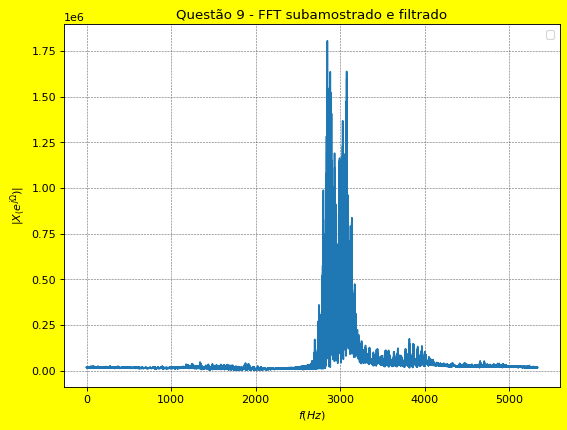

In [ ]:
k_inicial = int(2666.66)
k_final = int(45333.34)
X_som[k_inicial:k_final] = 0

som_recuperado = np.fft.ifft(X_som)

som_recuperado = som_recuperado[::9]

X_somrecuperado = np.abs(np.fft.fft(som_recuperado))


f_subfiltro = np.linspace(0, fs_nova, X_somrecuperado.size)

#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 9 - FFT subamostrado e filtrado")
ax.plot(f_subfiltro , X_somrecuperado)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$f (Hz)$')

No handles with labels found to put in legend.


Text(0.5, 0, '$f (Hz)$')

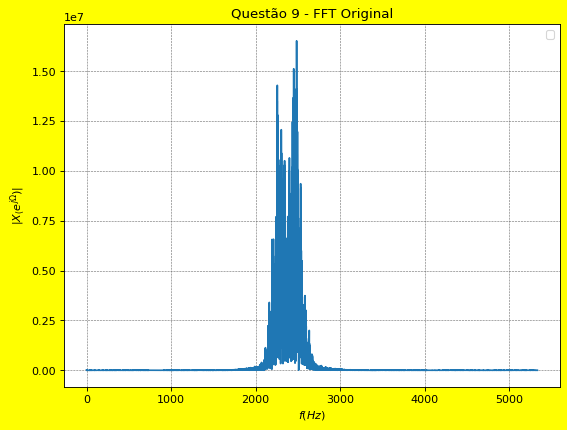

In [ ]:
X_som = np.abs(np.fft.fft(som))



lista = []

for i in range(int(X_som.size/9)):
  lista.append(X_som[i])

f = np.linspace(0, fs/9, len(lista))

#plota
fig = plt.figure(figsize=(8, 6), dpi=80,facecolor='yellow')
ax = fig.add_subplot(111)
plt.title("Questão 9 - FFT Original")
ax.plot(f , lista)
ax.grid(True, color='dimgray', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()
ax.set_ylabel('$|X_(e^{j\Omega})|$')
ax.set_xlabel('$f (Hz)$')

Percebe-se que ao filtrar antes de realizar a subamostragem, algumas frequências acabam sendo perdidas, mas conseguimos aproximar a fft obtida com a original.

**Questão 10**



O som do caso do filtro anti-aliasing ecoa menos, ou seja, perdeu algumas frequências, como comentado na questão anterior.

In [ ]:
som_sub_filtro = np.fft.ifft(X_somrecuperado)

ipd.Audio(som_sub_filtro,rate=fs_nova)


/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
subamostrado = som[::9]
fs_nova = fs/9
ipd.Audio(subamostrado,rate=int(fs_nova))